# __Analisis de Datos Históricos de consumo y precio en España (2000 - 2024)__

# Visualización de los datos.

Comenzamos importando las librerias necesarias para el análisis

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Analizando ciertas tendencias generales:

Para comenzar, agrupamos los datos por año para analizar la media de los precios y el consumo por cada uno de los años. 

In [25]:
df = pd.read_csv('../Filtered Data/Datos_consumo_precio_espana.csv')
general_tendencies = df.groupby('AÑO').mean()
general_tendencies.head(5)

,PRECIO,CONSUMOXCAPITA
AÑO,,
2000,3.256978,12.306555
2001,3.343074,12.494093
2002,3.516521,12.748400
2003,3.561792,12.409151
2004,3.752987,12.383353


Vamos a comenzar viendo ciertas __tendencias generales__:

In [26]:
precio = general_tendencies['PRECIO']
consumo = general_tendencies['CONSUMOXCAPITA']
año = general_tendencies.index

Text(0.5, 0.98, 'Tendencias Generales (Media de los 9 productos) (2000-2024)')

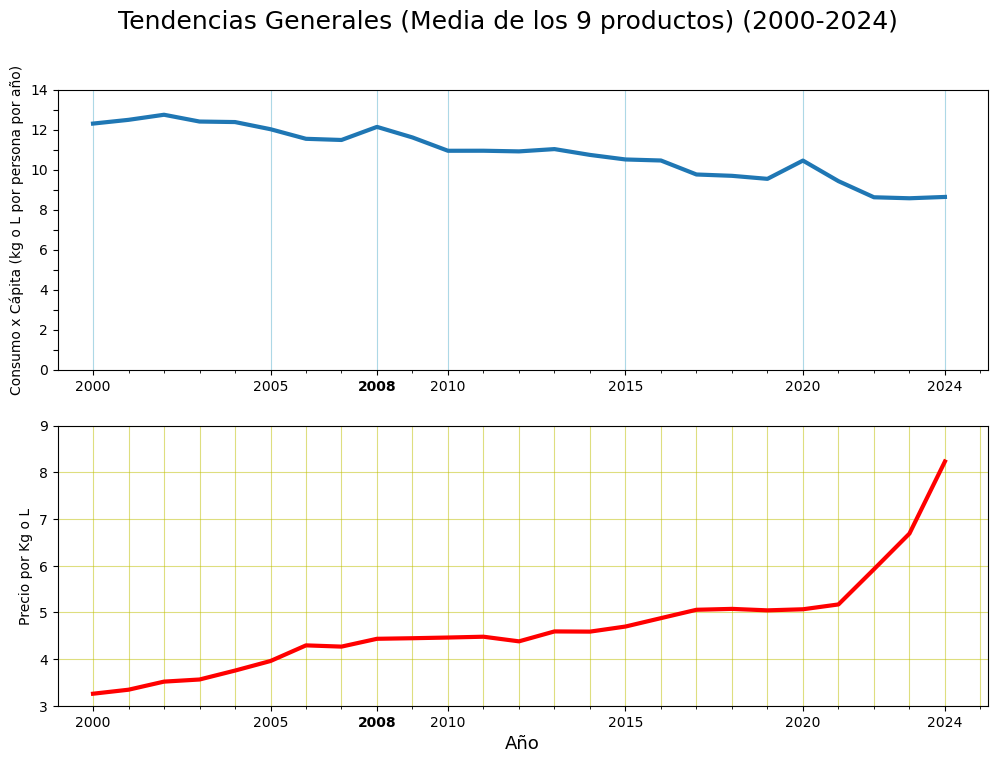

In [27]:
from matplotlib.ticker import AutoMinorLocator

fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(12,8))

axs[0].plot(año,consumo,lw=3)
axs[0].set_xticks([2000,2005,2008,2010,2015,2020,2024])
axs[0].set_yticks(np.arange(0,15))
axs[0].set_yticklabels([str(i) if i%2==0 else '' for i in np.arange(0,15)])
axs[0].set_ylim(0,14)
axs[0].set_xlim(1999)
axs[0].set_ylabel('Consumo x Cápita (kg o L por persona por año)')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True,color='lightblue',axis='x')

axs[1].plot(año,precio,'r',lw=3)
axs[1].set_xticks([2000,2005,2008,2010,2015,2020,2024])
axs[1].set_ylim(3,9)
axs[1].set_xlim(1999)
axs[1].set_ylabel('Precio por Kg o L')
axs[1].set_xlabel('Año',fontsize=13)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True,color='y',alpha=0.5,which='both')

for ax in axs:
    ax.set_xticklabels(['2000', '2005', '2008', '2010', '2015', '2020', '2024'])
    for label in ax.get_xticklabels():
        if label.get_text() == '2008':
            label.set_fontweight('bold')

fig.suptitle('Tendencias Generales (Media de los 9 productos) (2000-2024)',fontsize=18)

Aquí no he recalcado los valores del consumo per cápita ya que creo que por ahora solo __la tendencia es lo más representativo__, más tarde cuando tengamos una gráfica por cada producto estos datos serán más interesantes.

In [28]:
df.head(10)

,PRODUCTO,AÑO,PRECIO,CONSUMOXCAPITA
0,CARNE VACUNO,2000,6.625685,7.444887
1,CARNE POLLO,2000,2.535172,13.831885
2,CARNE CERDO,2000,4.050242,10.871962
3,SALMON,2000,6.521052,0.601413
4,PAN,2000,1.635339,50.126250
5,ARROZ,2000,0.983099,4.948498
6,ACEITE DE OLIVA,2000,2.403944,9.178628
7,TOMATES,2000,0.988081,12.984839
8,PLAT.PREP.CONSERVA,2000,3.570185,0.770634
9,CARNE VACUNO,2001,6.777772,6.165307


Vamos a visualizar __la evolución del precio__ durante los años de estudio:

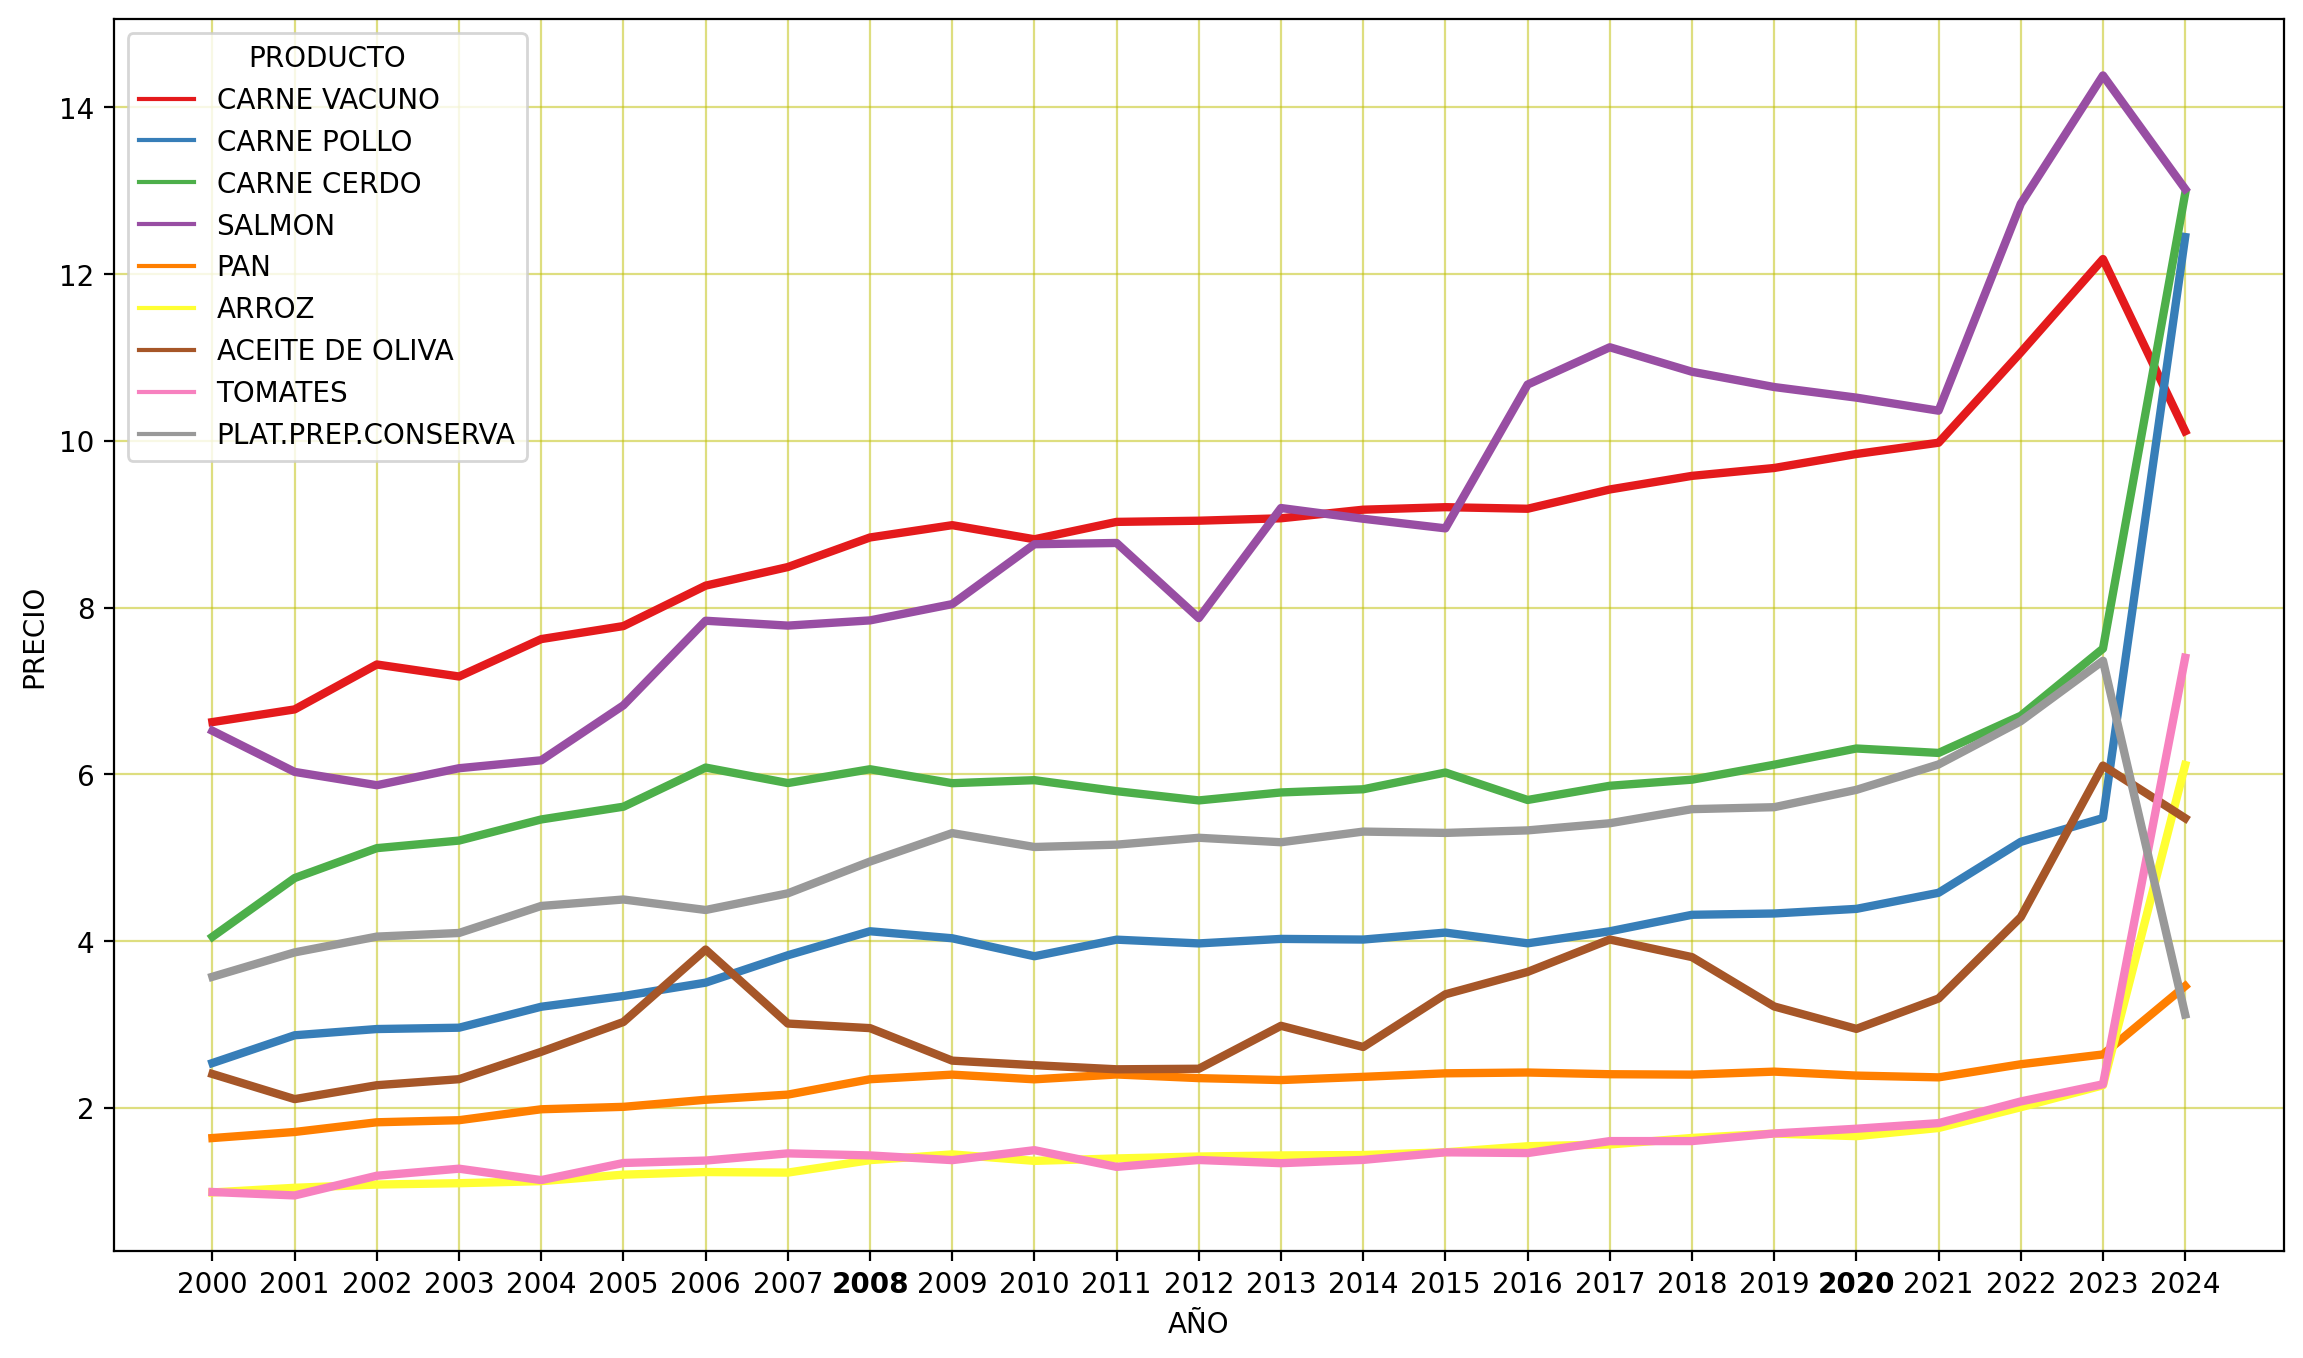

In [29]:

fig,axs = plt.subplots(figsize=(14,8),dpi=200)
sns.lineplot(data=df,x='AÑO',y='PRECIO',hue='PRODUCTO',palette='Set1',lw=3,ax=axs)
axs.grid(True,color='y',alpha=0.5,which='both')


axs.set_xticks([i for i in np.arange(2000,2025)])
axs.set_xticklabels([str(i)for i in np.arange(2000,2025)])
for label in axs.get_xticklabels():
    if label.get_text() in ['2008','2020']:
        label.set_fontweight('bold')

Viendo esta gráfica nos damos cuenta de que algo anda mal, las líneas del gráfico en el año 2024 parecen haberse vuelto locas.
Busco información en la página web del ministerio de agricultura y pesca y encuentro lo siguiente:

* __NOTA: los datos desde junio de 2024 se han recalculado y actualizado debido a unos cambios en el etiquetado de los productos (código de barras, QR) que afectaban a su correcta cuantificación!!!__

A partir de este momento se ha excluido el año 2024 del análisis por incoherencias en los precios, como el del pollo por encima de 13 €/kg. __Se espera una futura estabilización de estos registros.__

In [30]:
df = df.loc[df['AÑO']<2024]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216 entries, 0 to 215
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRODUCTO        216 non-null    object 
 1   AÑO             216 non-null    int64  
 2   PRECIO          216 non-null    float64
 3   CONSUMOXCAPITA  216 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.4+ KB


__A partir de ahora vamos a visualizar los datos sin el año 2024 debido a  la problemática anterior.__

Text(0.5, 0.98, 'Tendencias Generales (Media de los 9 productos) (2000-2023)')

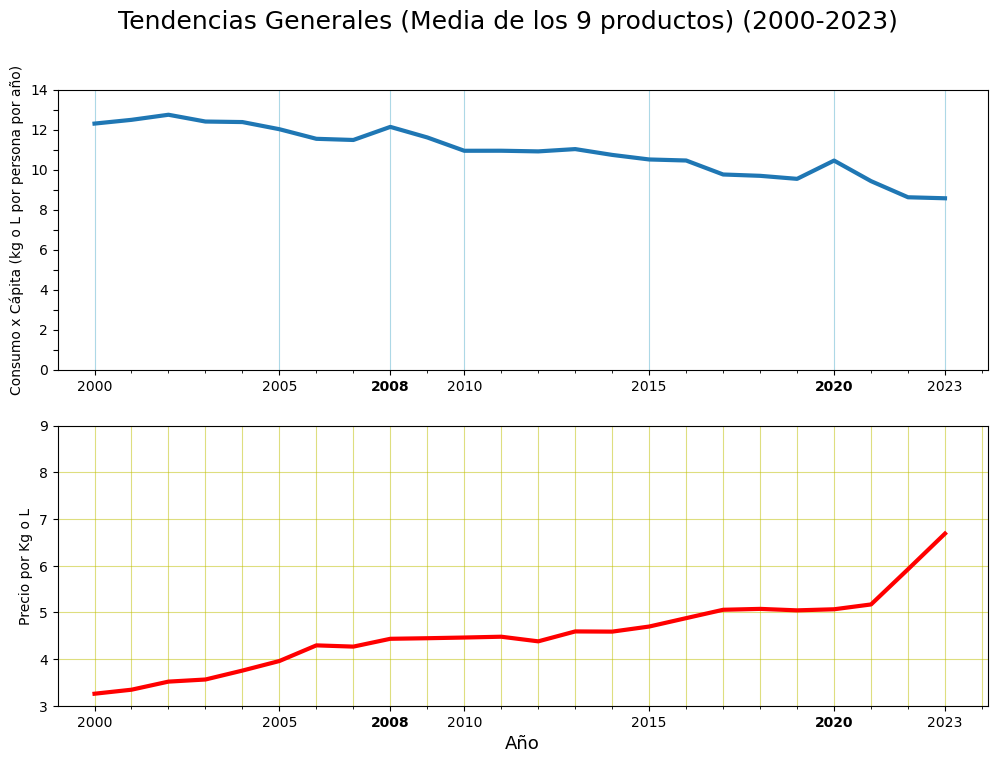

In [31]:
general_tendencies = df.groupby('AÑO').mean()
general_tendencies.head(10)

precio = general_tendencies['PRECIO']
consumo = general_tendencies['CONSUMOXCAPITA']
año = general_tendencies.index

from matplotlib.ticker import AutoMinorLocator

fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(12,8))

axs[0].plot(año,consumo,lw=3)
axs[0].set_xticks([2000,2005,2008,2010,2015,2020,2023])
axs[0].set_yticks(np.arange(0,15))
axs[0].set_yticklabels([str(i) if i%2==0 else '' for i in np.arange(0,15)])
axs[0].set_ylim(0,14)
axs[0].set_xlim(1999)
axs[0].set_ylabel('Consumo x Cápita (kg o L por persona por año)')
axs[0].xaxis.set_minor_locator(AutoMinorLocator())
axs[0].grid(True,color='lightblue',axis='x')

axs[1].plot(año,precio,'r',lw=3)
axs[1].set_xticks([2000,2005,2008,2010,2015,2020,2023])
axs[1].set_ylim(3,9)
axs[1].set_xlim(1999)
axs[1].set_ylabel('Precio por Kg o L')
axs[1].set_xlabel('Año',fontsize=13)
axs[1].xaxis.set_minor_locator(AutoMinorLocator())
axs[1].grid(True,color='y',alpha=0.5,which='both')

for ax in axs:
    ax.set_xticklabels(['2000', '2005', '2008', '2010', '2015', '2020', '2023'])
    for label in ax.get_xticklabels():
        if label.get_text() in ['2008','2020']:
            label.set_fontweight('bold')

fig.suptitle('Tendencias Generales (Media de los 9 productos) (2000-2023)',fontsize=18)

Aquí podemos observar que el incremento del precio medio a lo largo de los años y el descenso del consumo x cápita de los alimentos estudiados.

In [32]:
x = general_tendencies.loc[2000,'PRECIO']
y = general_tendencies.loc[2023,'PRECIO']
f'El precio ha aumentado desde {round(x,2)} euros en el año 2000 hasta {round(y,2)} euros en el año 2023, lo que supone un aumento del {round(((y-x)/x)*100,2)} %'

'El precio ha aumentado desde 3.26 euros en el año 2000 hasta 6.69 euros en el año 2023, lo que supone un aumento del 105.36 %'

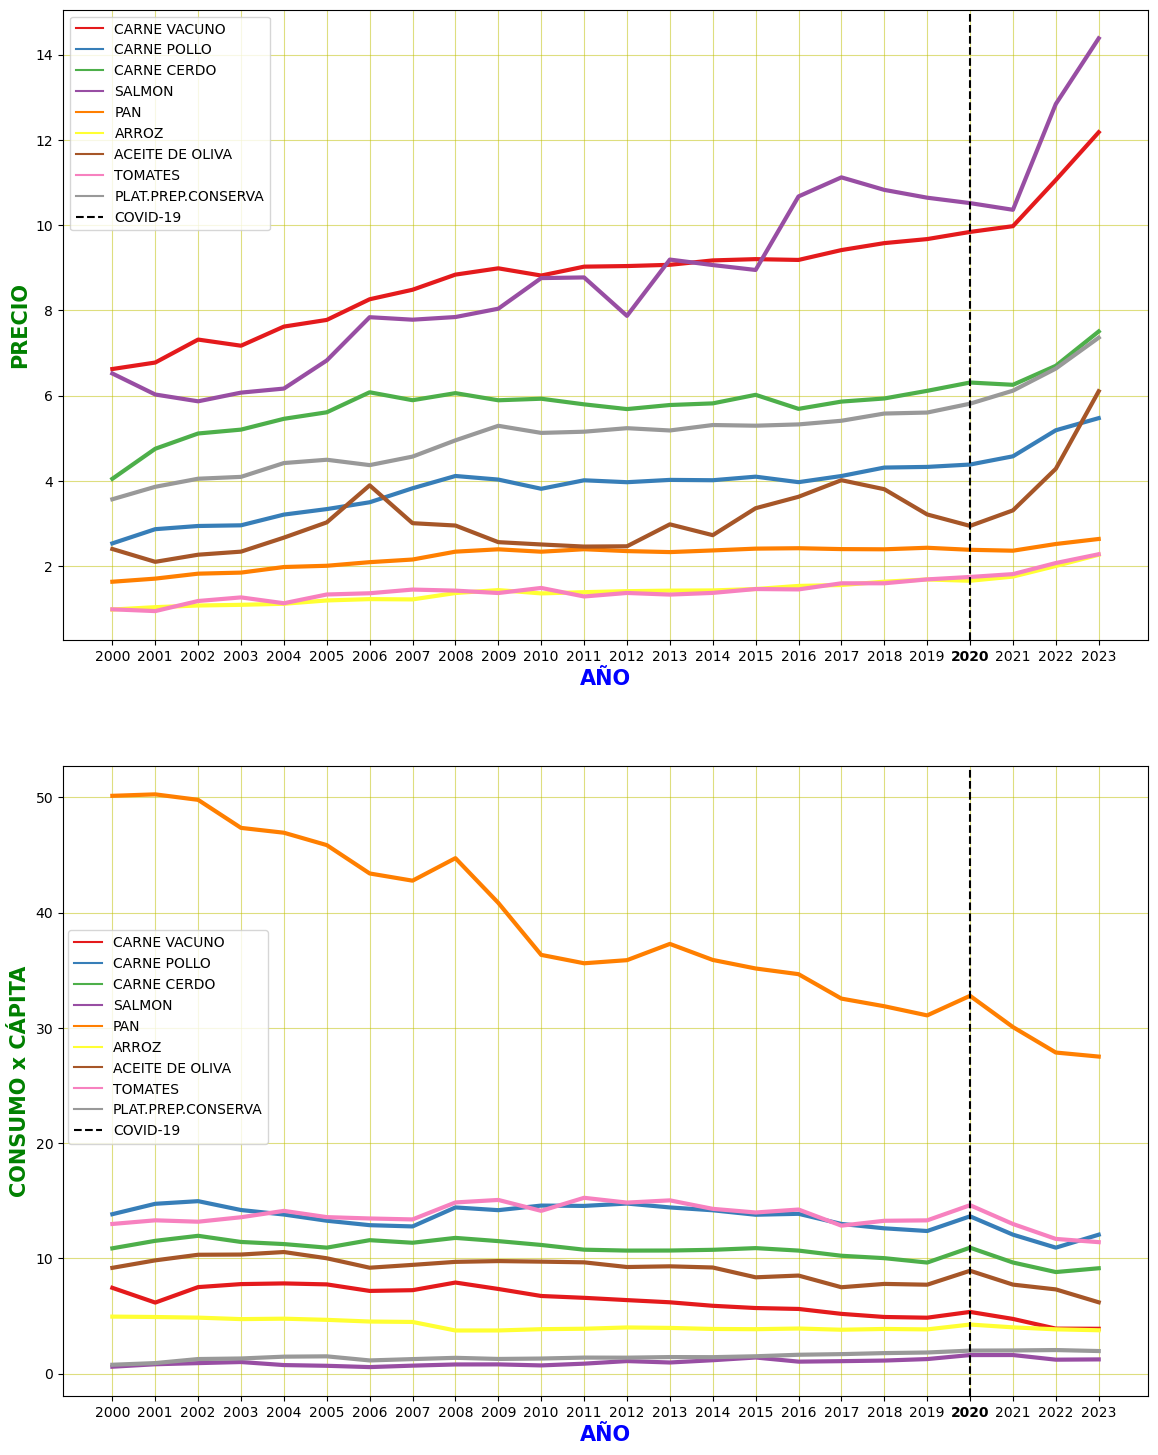

In [33]:
fig,axs = plt.subplots(nrows=2,ncols=1,figsize=(14,18))
sns.lineplot(data=df,x='AÑO',y='PRECIO',hue='PRODUCTO',palette='Set1',lw=3,ax=axs[0])
axs[0].grid(True,color='y',alpha=0.5,which='both')
axs[0].set_xlabel('AÑO',fontweight=900,size=15,color='blue')
axs[0].set_ylabel('PRECIO',fontweight=900,size=15,color='green')

axs[0].set_xticks([i for i in np.arange(2000,2024)])
axs[0].set_xticklabels([str(i)for i in np.arange(2000,2024)])
for label in axs[0].get_xticklabels():
    if label.get_text() == '2020':
        label.set_fontweight('bold')

axs[0].axvline(x=2020, color='black', linestyle='--', label='COVID-19')
axs[0].legend()

sns.lineplot(data=df,x='AÑO',y='CONSUMOXCAPITA',hue='PRODUCTO',palette='Set1',lw=3,ax=axs[1])
axs[1].grid(True,color='y',alpha=0.5,which='both')
axs[1].set_xlabel('AÑO',fontweight=900,size=15,color='blue')
axs[1].set_ylabel('CONSUMO x CÁPITA',fontweight=900,size=15,color='green')

axs[1].set_xticks([i for i in np.arange(2000,2024)])
axs[1].set_xticklabels([str(i)for i in np.arange(2000,2024)])
for label in axs[1].get_xticklabels():
    if label.get_text() == '2020':
        label.set_fontweight('bold')

axs[1].axvline(x=2020, color='black', linestyle='--', label='COVID-19')
axs[1].legend(loc=(0.005,0.4))

Analizando este segundo gráfico cabe recalcar el gran aumento del precio de varios productos como el __salmón__, la __carne de vacuno__ y el __aceite de oliva__, así como el tremendo descenso en el consumo per cápita del __pan__ en la dieta española.

## Análisis de PRECIO vs CONSUMOxCÁPITA por producto:

Ahora vamos a visualizar la evolución del precio con respecto al consumo x cápita de cada producto durante los años 2000-2023

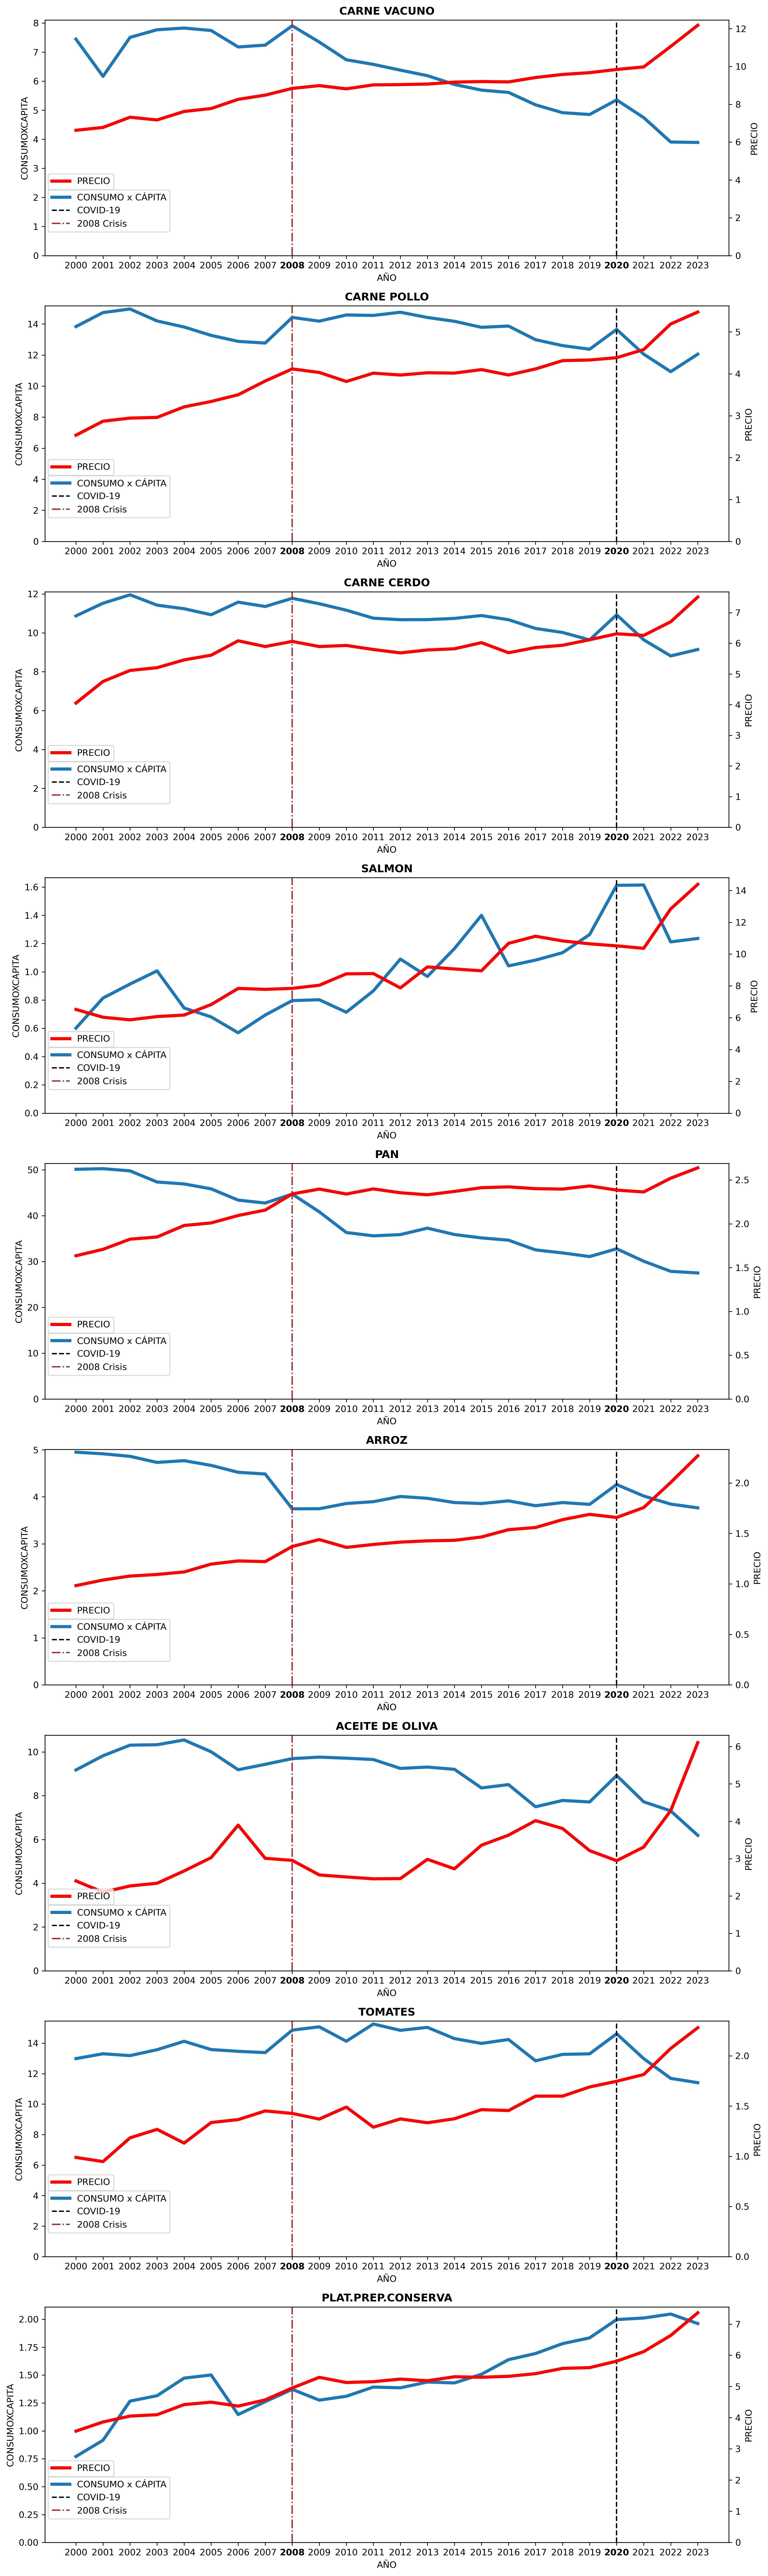

In [34]:
list_of_products = df['PRODUCTO'].unique()
fig,axs = plt.subplots(nrows=len(list_of_products),ncols=1,figsize=(12,40),dpi=300)
for idx,product in enumerate(list_of_products):
    df_1=df[df['PRODUCTO']==product]
    
    axs[idx].set_xticks([i for i in np.arange(2000,2024)])
    axs[idx].set_xticklabels([str(i) for i in np.arange(2000,2024)])

    sns.lineplot(y='CONSUMOXCAPITA',x='AÑO',data=df_1,ax=axs[idx],lw=3.5,label='CONSUMO x CÁPITA')
    axs[idx].set_title(product,fontweight=900)
    axs[idx].set_ylim(0)
    for label in axs[idx].get_xticklabels():
        if label.get_text() in ['2008','2020']:
            label.set_fontweight('bold')

    ax2 = axs[idx].twinx()
    sns.lineplot(y='PRECIO',x='AÑO',data=df_1,ax=ax2,color='red',lw=3.5,label='PRECIO')
    ax2.set_ylim(0)

    axs[idx].axvline(x=2020, color='black', linestyle='--', label='COVID-19')
    axs[idx].axvline(x=2008, color='brown', linestyle='-.', label='2008 Crisis')

    axs[idx].legend(loc=(0.005,0.1))
    ax2.legend(loc=(0.005,0.28))

plt.tight_layout()

In [35]:
carnes=  df[df['PRODUCTO'].str.contains('carne',case=False)]
carnes = carnes.groupby('AÑO').mean()
x = carnes.loc[2020,'PRECIO']
y = carnes.loc[2023,'PRECIO']
f'El precio ha aumentado desde {round(x,2)} euros en el año 2020 hasta {round(y,2)} euros en el año 2023, lo que supone un aumento del {round(((y-x)/x)*100,2)} %'

'El precio ha aumentado desde 6.85 euros en el año 2020 hasta 8.39 euros en el año 2023, lo que supone un aumento del 22.53 %'

In [36]:
x = df.loc[(df['PRODUCTO']=='SALMON')&(df['AÑO']==2021),'PRECIO'].iloc[0]
y = df.loc[(df['PRODUCTO']=='SALMON')&(df['AÑO']==2023),'PRECIO'].iloc[0]
f'El precio ha aumentado desde {round(x,2)} euros en el año 2021 hasta {round(y,2)} euros en el año 2023, lo que supone un aumento del {round(((y-x)/x)*100,2)} %'

'El precio ha aumentado desde 10.36 euros en el año 2021 hasta 14.38 euros en el año 2023, lo que supone un aumento del 38.82 %'

In [37]:
x = df.loc[(df['PRODUCTO']=='PAN')&(df['AÑO']==2000),'CONSUMOXCAPITA'].iloc[0]
y = df.loc[(df['PRODUCTO']=='PAN')&(df['AÑO']==2023),'CONSUMOXCAPITA'].iloc[0]
f'El consumo ha aumentado desde {round(x,2)} kg x cápita en el año 2000 hasta {round(y,2)} kg x cápita en el año 2023, lo que supone un cambio del {round(((y-x)/x)*100,2)} %'

'El consumo ha aumentado desde 50.13 kg x cápita en el año 2000 hasta 27.51 kg x cápita en el año 2023, lo que supone un cambio del -45.13 %'

In [38]:
x = df.loc[(df['PRODUCTO']=='ACEITE DE OLIVA')&(df['AÑO']==2020),'PRECIO'].iloc[0]
y = df.loc[(df['PRODUCTO']=='ACEITE DE OLIVA')&(df['AÑO']==2023),'PRECIO'].iloc[0]
f'El precio ha aumentado desde {round(x,2)} euros en el año 2020 hasta {round(y,2)} euros en el año 2023, lo que supone un aumento del {round(((y-x)/x)*100,2)} %'

'El precio ha aumentado desde 2.95 euros en el año 2020 hasta 6.1 euros en el año 2023, lo que supone un aumento del 107.25 %'

In [39]:
x = df.loc[(df['PRODUCTO']=='TOMATES')&(df['AÑO']==2020),'PRECIO'].iloc[0]
y = df.loc[(df['PRODUCTO']=='TOMATES')&(df['AÑO']==2023),'PRECIO'].iloc[0]
f'El precio ha aumentado desde {round(x,2)} euros en el año 2020 hasta {round(y,2)} euros en el año 2023, lo que supone un aumento del {round(((y-x)/x)*100,2)} %'

'El precio ha aumentado desde 1.75 euros en el año 2020 hasta 2.28 euros en el año 2023, lo que supone un aumento del 30.52 %'

* __CARNES__ Aquí podemos observar como las carnes han ido subiendo de precio y sobretodo en los dos últimos años de estudio que han aumentado un 22.53% de media. El consumo de carne en lineas generales ha bajado a lo largo de los años, coincidiendo las mayores caidas en consumo con la crisis del 2008 y la pandemia del COVID. Es bastante interesante fijarse en que en el caso del pollo y el cerdo, el consumo ha bajado o se ha mantenido sin coincidir con una subida en los precios. 

* __SALMÓN:__ Aquí podemos apreciar que el consumo del salmón ha ido subiendo a lo largo de los años siguiendo nuevas tendencias alimenticias y coincidiendo los picos de mayor consumo con bajadas de precio y experimentando un incremento de precio del 38.82% en los últimos dos años de estudio.

* __PAN:__ Podemos apreciar que el precio fué creciendo y el consumo bajando hasta que, coincidiendo con la crisis de 2008, ambas lineas en el gráfico se cruzan por última vez y habiendo experimentado un descenso de 50kg por persona de media al año hasta 27kg en 2023, lo que supone un descenso del 45.13%

* __ARROZ:__ El arroz tiene una gráfica con unas tendencias de consumo y precio muy simétricas, ya que conforme va aumentanto el precio baja el consumo.

* __ACEITE DE OLIVA:__ El aceite de oliva, siendo España el mayor productor a nivel mundial, a fecha de 2023, se encuentra en máximos históricos de precio.
__El precio ha aumentado desde 2.95 euros en el año 2020 hasta 6.1 euros en el año 2023, lo que supone un aumento del 107.25 %__ lo cual nos deja una tendencia muy preocupante siendo el aceite de oliva uno de los pilares de nuestra dieta mediterránea y una fuente formidable de ácidos grasos omega 9.

* __TOMATES:__ Al igual que la mayoría de los productos estudiados el consumo baja a partir del 2020 y el precio ha aumentado desde 1.75 euros en el año 2020 hasta 2.28 euros en el año 2023, lo que supone un aumento del 30.52 %.

* __PLAT.PREP.CONSERVA__ Las conservas son un caso interesante ya que vemos como, al contrario que otros productos, el consumoo aumenta a la par que lo hace el precio en vez de decrecer.

## Cambios percentuales de los precios por año y comparación con el incremento percentual del salario medio desde el 2008:

Como último ejercicio de este análisis, vamos a relacionar el salario medio de los españoles (todas las edades y ambos sexos) con la evolución del precio de los alimentos, con el objetivo de visualizar si el incremento de los ingresos anuales ha sido proporcional al aumento de los precios alimentarios, o si por el contrario, se ha quedado rezagado frente a la inflación del sector y el consecuente encarecimiento del nivel de vida.

In [40]:
salario=pd.read_csv('../Filtered Data/Salarios.csv')
salario.head()

,AÑO,Ganancia
0,2023,28049.94
1,2022,26948.87
2,2021,25896.82
3,2020,25165.51
4,2019,24395.98


Primero de todo creo una `tabla pivot`con los precios por producto, teniendo una columna de `AÑO`, sobre la que uno el dataset de `salarios`.

Tras eso, convierto los precios en cambios percentuales de los mismos, año tras año.

Luego convierto a los porcentajes en factores, los multiplico acumulativamente para tras esto los convertirlos a porcentajes otra vez para ver el incremento porcentual total de este periodo.

In [41]:
df_pivot = df.pivot(index='AÑO', columns='PRODUCTO', values='PRECIO')
df_pivot = pd.merge(df_pivot,salario,on='AÑO',how='inner')

col_excluida = df_pivot['AÑO']

df_pct = df_pivot[['ACEITE DE OLIVA', 'ARROZ', 'CARNE CERDO', 'CARNE POLLO',
                    'CARNE VACUNO', 'PAN', 'PLAT.PREP.CONSERVA', 'SALMON', 'TOMATES',
                    'Ganancia']].pct_change() * 100

df_factores=1+(df_pct/100)
df_factor_acumulado=df_factores.cumprod()
df_pct_acumulado=(df_factor_acumulado -1)*100


df_pct_acumulado['AÑO'] = col_excluida
df_factores.head()


,ACEITE DE OLIVA,ARROZ,CARNE CERDO,CARNE POLLO,CARNE VACUNO,PAN,PLAT.PREP.CONSERVA,SALMON,TOMATES,Ganancia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.867957,1.050249,0.972359,0.979554,1.016693,1.023605,1.068849,1.024913,0.960617,1.028700
2,0.978793,0.945999,1.006157,0.946513,0.981172,0.976472,0.968539,1.089320,1.087080,1.012382
3,0.980319,1.021308,0.977747,1.052153,1.023642,1.024861,1.005465,1.001736,0.865561,1.004789
4,1.002706,1.016700,0.980872,0.988778,1.001559,0.981731,1.016019,0.897283,1.063993,0.992449


In [42]:
df_factor_acumulado.head()

,ACEITE DE OLIVA,ARROZ,CARNE CERDO,CARNE POLLO,CARNE VACUNO,PAN,PLAT.PREP.CONSERVA,SALMON,TOMATES,Ganancia
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.867957,1.050249,0.972359,0.979554,1.016693,1.023605,1.068849,1.024913,0.960617,1.028700
2,0.849550,0.993534,0.978346,0.927161,0.997551,0.999522,1.035222,1.116458,1.044268,1.041437
3,0.832830,1.014704,0.956575,0.975515,1.021135,1.024371,1.040880,1.118397,0.903878,1.046425
4,0.835083,1.031649,0.938278,0.964568,1.022727,1.005657,1.057554,1.003518,0.961720,1.038523


In [43]:
df_pct_acumulado.head()

,ACEITE DE OLIVA,ARROZ,CARNE CERDO,CARNE POLLO,CARNE VACUNO,PAN,PLAT.PREP.CONSERVA,SALMON,TOMATES,Ganancia,AÑO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008
1,-13.204307,5.024860,-2.764110,-2.044643,1.669252,2.360527,6.884878,2.491257,-3.938305,2.869981,2009
2,-15.044970,-0.646577,-2.165398,-7.283944,-0.244937,-0.047796,3.522190,11.645818,4.426758,4.143685,2010
3,-16.716984,1.470424,-4.342489,-2.448501,2.113497,2.437117,4.087975,11.839685,-9.612243,4.642464,2011
4,-16.491655,3.164940,-6.172195,-3.543203,2.272675,0.565661,5.755384,0.351810,-3.828045,3.852323,2012


Ahora selecciono el porcentaje acumulado total. que corresponde con la última fila del dataset `df_pct_acumulado`.

In [44]:
df_last = df_pct_acumulado.tail(1)

In [45]:
df_last = df_last.drop(columns='AÑO').reset_index(drop=True)
df_last

,ACEITE DE OLIVA,ARROZ,CARNE CERDO,CARNE POLLO,CARNE VACUNO,PAN,PLAT.PREP.CONSERVA,SALMON,TOMATES,Ganancia
0,106.627023,65.528641,23.879361,32.980344,37.781252,12.703926,48.634168,83.330523,59.838644,28.178959


__Ahora podemos visualizar en qué porcentaje se han incrementado los precios de los productos (2008-2023) en comparación con lo que ha incrementado porcentualmente el salario medio de los Españoles.__

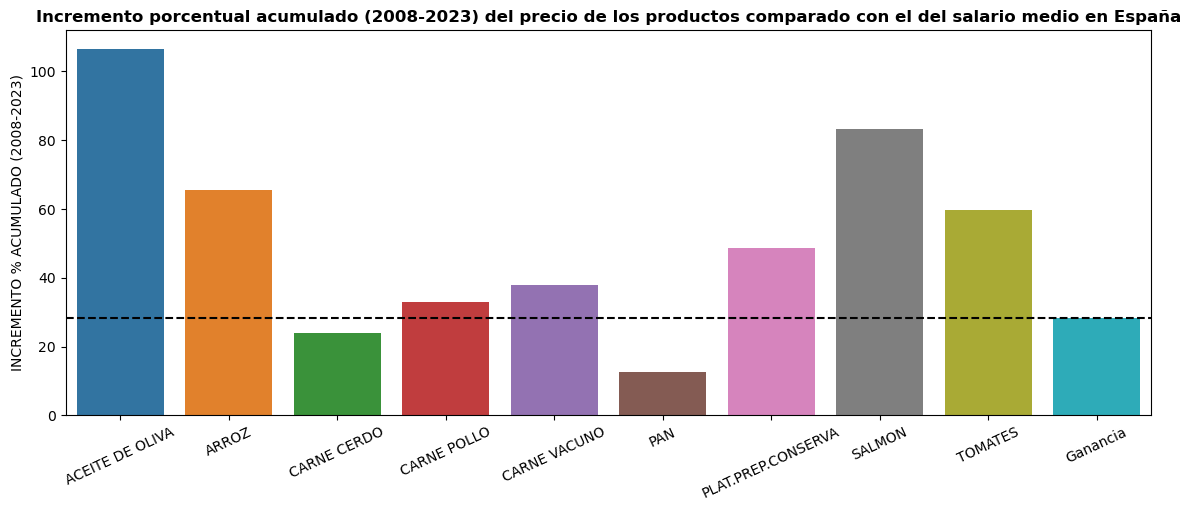

In [47]:
plt.figure(figsize=(14,5))
ax = sns.barplot(data=df_last,palette='tab10')
ax.set_ylabel('INCREMENTO % ACUMULADO (2008-2023)')
ax.set_title('Incremento porcentual acumulado (2008-2023) del precio de los productos comparado con el del salario medio en España',fontweight=900)
ax.tick_params(axis='x', labelrotation=25)
ax.axhline(y=df_last['Ganancia'].values, color='black', linestyle='--')


Aquí podemos ver que el incremento porcentual total de las ganancias medias anuales durante estos años ha sido del 28% pero que esta subida se queda atras con respecto al incremento porcentual de los precios de muchos productos básicos en nuestra dieta como el arroz(65.5%), los tomates(59.8), el aceite de oliva(__106.6%__), el salmón(83.%) y la carne de vacuno(37.8%) entre otros.